
# Comparative Sentiment Analysis 
# Using VADER in NLTK And Hugging Face's RoBERTa Pretrained Model

Research question : 
How does the Sentiment Analysis performance using VADER in NLTK compare with the Hugging Face's RoBERTa pretrained model when analyzing Women's E-commerce Clothing reviews?

# Introduction

Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text especially inorder to determine whether the respondent's attribute towards a particular topic, product etc. is positive, negative or neutral. Sentiment analysis has emerged as a pivotal tool in understanding and interpreting the vast amount of textual data available on the internet, providing valuable insights into the opinions, emotions, and sentiments expressed by users. In the realm of women's clothing reviews, where subjective experiences and personal preferences play a significant role, sentiment analysis becomes particularly relevant. 

This comparative sentiment analysis project delves into the application of two distinct methods: VADER in NLTK and a RoBERTa pre-trained model. Through extensive exploratory data analysis, graph visualization, and comprehensive score assessments, we aim to unravel the sentiment behind women's clothing reviews and find out the strengths and limitations of each approach.

Data Collection : Women's E-commerce Clothing review dataset was chosen for this project from Kaggle.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import nltk

# Exploratory Data Analysis

In [2]:
dataframe = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(dataframe.shape)

(23486, 11)


This is the Women’s Clothing E-Commerce dataset with the reviews written by customers along with their Rating on the product.The dataset contains 23,486 rows and 10 feature variables.

In [3]:
dataframe.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


The columns are Serial number(Unnamed:0), Clothing ID, Age, Title, Review Text, Rating, Recommended IND, Positive Feedback Count, Division Name, Department Name and Class Name.

In [4]:
dataframe['Review Text'].values[0]

'Absolutely wonderful - silky and sexy and comfortable'

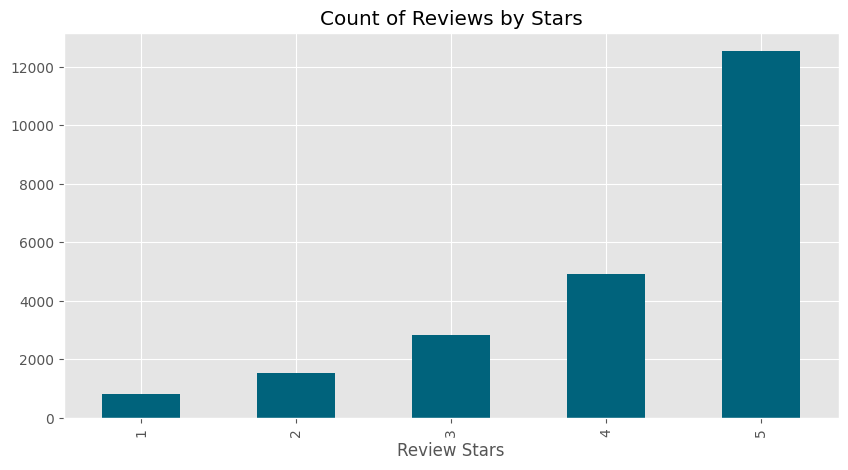

In [43]:
axes = dataframe['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5),
          color='#00637C')

axes.set_xlabel('Review Stars')
plt.show()

We can see our dataset is more biased to positive, with about 550 5-star rating and about 225 4-star rating and only about 25 1-star rating.

In [6]:
example = dataframe['Review Text'][300]
print(example)

This dress is stunning- vibrant colors and flirty feel to it. i got the small and i am a 34b/27 pants, 132 lbs- great fit. i only question two things- am i tall enough to pull off the extra fabric in the back and what the heck do you where for a bra? those two considerations are why i didn't give it 5 stars.


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:20]

['This',
 'dress',
 'is',
 'stunning-',
 'vibrant',
 'colors',
 'and',
 'flirty',
 'feel',
 'to',
 'it',
 '.',
 'i',
 'got',
 'the',
 'small',
 'and',
 'i',
 'am',
 'a']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('dress', 'NN'),
 ('is', 'VBZ'),
 ('stunning-', 'JJ'),
 ('vibrant', 'JJ'),
 ('colors', 'NNS'),
 ('and', 'CC'),
 ('flirty', 'JJ'),
 ('feel', 'NN'),
 ('to', 'TO')]

This will give us the part of speech of all the tokens.
For example:
* NN - noun, singular (cat, tree)
* PRP - personal pronoun (hers, herself, him, himself) 
* VBP - verb, present tense not 3rd person singular(wrap)
* RB - adverb (occasionally, swiftly)
* JJ - adjective (large)

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  dress/NN
  is/VBZ
  stunning-/JJ
  vibrant/JJ
  colors/NNS
  and/CC
  flirty/JJ
  feel/NN
  to/TO
  it/PRP
  ./.
  i/NN
  got/VBD
  the/DT
  small/JJ
  and/CC
  i/JJ
  am/VBP
  a/DT
  34b/27/CD
  pants/NNS
  ,/,
  132/CD
  lbs-/JJ
  great/JJ
  fit/NN
  ./.
  i/VBZ
  only/RB
  question/JJ
  two/CD
  things-/JJ
  am/VBP
  i/JJ
  tall/VBP
  enough/RB
  to/TO
  pull/VB
  off/RP
  the/DT
  extra/JJ
  fabric/NN
  in/IN
  the/DT
  back/NN
  and/CC
  what/WP
  the/DT
  heck/NN
  do/VBP
  you/PRP
  where/WRB
  for/IN
  a/DT
  bra/NN
  ?/.
  those/DT
  two/CD
  considerations/NNS
  are/VBP
  why/WRB
  i/NN
  did/VBD
  n't/RB
  give/VB
  it/PRP
  5/CD
  stars/NNS
  ./.)


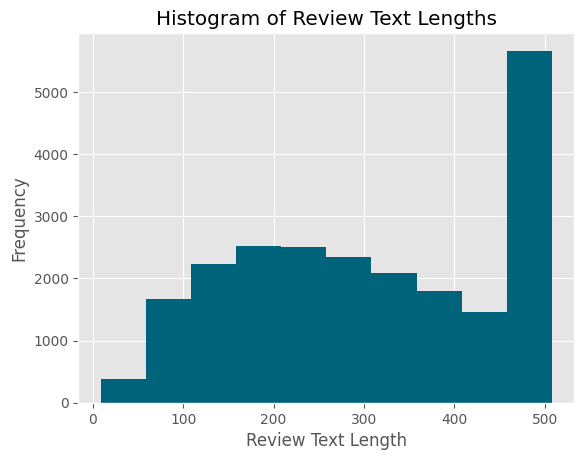

In [41]:
dataframe['Review Text'].str.len().hist(color='#00637C')
plt.title('Histogram of Review Text Lengths')
plt.xlabel('Review Text Length')
plt.ylabel('Frequency')
plt.show()


The review text length ranges from 0 to 500. And most of the reviews are long with more that 450 characters.

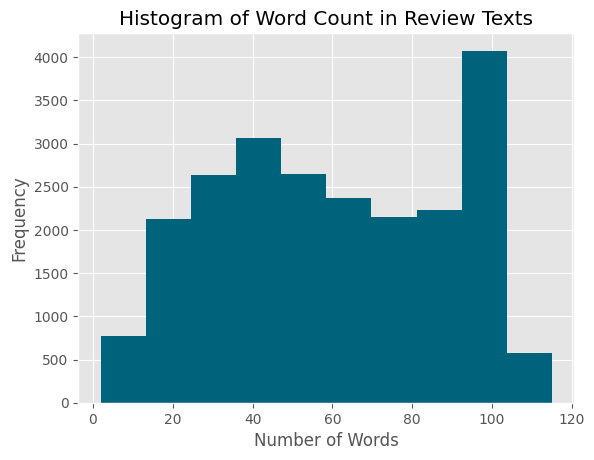

In [42]:
# drop null values in review text column
dataframe = dataframe.dropna(subset=['Review Text'])

# Splitting the text into words, calculate the length of each list of words
dataframe['Review Text'].str.split().map(lambda x: len(x)).hist(color='#00637C')

plt.title('Histogram of Word Count in Review Texts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Number of words in the review texts range between 0 to 120

# VADER Sentiment Scoring - Using Bag of words approach.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool implemented in the Natural Language Toolkit (NLTK). Unlike traditional sentiment analysis methods that rely solely on word frequency or machine learning algorithms, VADER employs a lexicon and rule-based approach to determine sentiment in text. Developed specifically for social media content, VADER is designed to handle the nuances of informal language, emoticons, and short texts commonly found in platforms like Twitter.

**Bag of Words Approach:**

The bag of words (BoW) approach is a simple and widely used technique in natural language processing and sentiment analysis. It represents a document as an unordered set of words, disregarding grammar and word order but retaining information about word frequency. Each document is then represented as a "bag" of its words, making it suitable for various text classification tasks, including sentiment analysis.

**Strength:**

1. Rule-Based Approach: VADER's rule-based approach allows it to consider not only individual words but also the context and sentiment intensity modifiers, making it adept at handling sentiment nuances in short and informal texts.

2. Emoticon Recognition: VADER is designed to recognize and interpret emoticons, which are prevalent in social media and can carry significant sentiment cues.

3. Pre-built Lexicon: VADER comes with a pre-built sentiment lexicon that assigns polarity scores to words. This lexicon includes terms specific to social media and colloquial language, enhancing its performance in those contexts.

4. Fast Processing: VADER's rule-based nature makes it computationally efficient, allowing for real-time analysis of large volumes of text.

**Limitation:**

1. Contextual Challenges: VADER may struggle with certain types of context-dependent sentiment, as its lexicon-based approach does not capture nuanced meanings or sarcasm well.

2. Domain Specificity: The pre-built lexicon may not be comprehensive for specialized domains, and the model's performance can be affected when applied outside its designed context.

3. Limited to English: VADER is primarily designed for English text and may not perform optimally with texts in other languages.

4. Inability to Learn from Data: Unlike machine learning approaches, VADER does not learn from data, making it less adaptable to new or evolving language patterns.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
sia.polarity_scores('this product is amazing!')

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6239}

In [44]:
sia.polarity_scores('this product is ❤️😍')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [14]:
sia.polarity_scores('the dress is 😖🤮 ')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [15]:
sia.polarity_scores('the dress is horrible😖🤮 ')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In both the situation, including just emogis (both positive and negative) and with a negative text 'horrible', VADER showed a neutral score.

In [16]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9217}

In [17]:
# Run the polarity score on the entire dataset
results = {}
for i, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
    text = row['Review Text']
    myid = row['Unnamed: 0']
    
    # Was getting an attribute error that some of the Review text had type 'float', 
    #hence first check if Review Text ('text') is a string, and if not, skip the row
    if not isinstance(text, str):
        continue

    results[myid] = sia.polarity_scores(text)

  0%|          | 0/22641 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Unnamed: 0'})
vaders = vaders.merge(dataframe, how='left')

In [19]:
vaders.head()

,Unnamed: 0,neg,neu,pos,compound,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0.000,0.272,0.728,0.8932,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,0.000,0.664,0.336,0.9729,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,0.027,0.792,0.181,0.9427,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,0.226,0.340,0.434,0.5727,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,0.000,0.700,0.300,0.9291,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


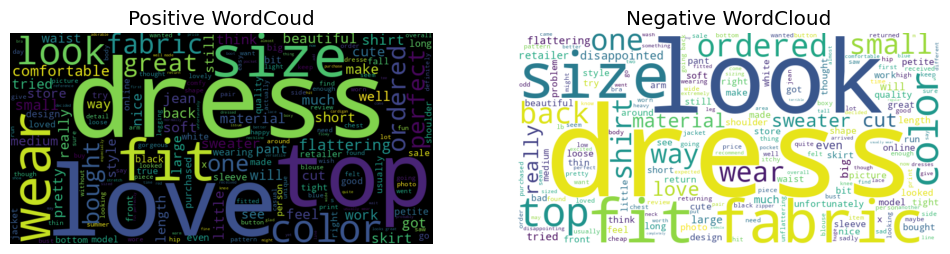

In [20]:
#making two word clouds (positive and negative) of the Review Text based on the sentiment scores.
vaders = vaders[vaders['Review Text'].apply(lambda x: isinstance(x, str))]

positive_vaders = vaders[vaders['compound'] > 0]
negative_vaders = vaders[vaders['compound'] < 0]

positive_text = ' '.join(positive_vaders['Review Text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)
negative_text = ' '.join(negative_vaders['Review Text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive WordCoud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative WordCloud')
plt.axis("off")

plt.show()

The word 'love', 'great', 'perfect' etc is frequently used in the reviews,suggesting the customers were satisfied with the products they purchased. The negative wordcloud does not give us a lot of negative words. And the words like 'dress', 'fit' 'size', 'fabric' etc are being repeated in both the word clouds which does not give us any information about the sentiment of the review.

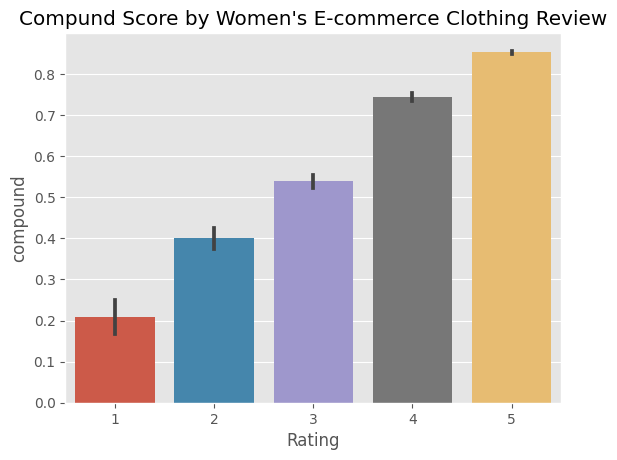

In [21]:
#plotting VEDAR results
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title("Compund Score by Women's E-commerce Clothing Review")
plt.show()

As expected, we can see that there is a positive slope, with low compound scores for Rating 1 and high compound scores for high ratings.

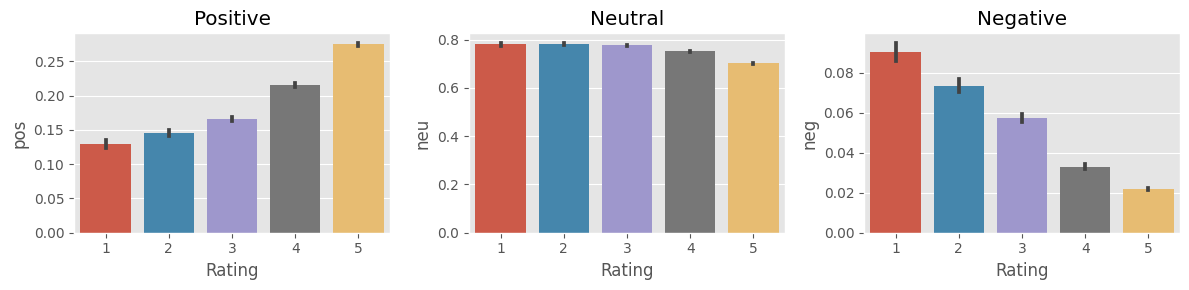

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# ROBERTa Pretrained Model

RoBERTa, which stands for Robustly optimized BERT approach, is a pre-trained natural language processing (NLP) model introduced by Facebook AI. It is built upon the architecture of BERT (Bidirectional Encoder Representations from Transformers) and is designed to overcome some of its limitations while improving overall performance in various NLP tasks. 
RoBERTa is pre-trained on a massive corpus of diverse and extensive text data, enabling it to learn rich contextual representations of words and sentences. Unlike BERT, RoBERTa trains on longer sequences of text, removing the Next Sentence Prediction (NSP) objective and dynamically adjusting the masking pattern during pre-training.

**Strengths:**

1. Contextual Understanding: RoBERTa excels at capturing intricate contextual relationships in language, allowing it to understand and generate more nuanced representations of text.

2. Transfer Learning: Being pre-trained on a large dataset, RoBERTa demonstrates strong transfer learning capabilities. It can be fine-tuned for specific downstream tasks, such as sentiment analysis or text classification, with relatively small amounts of task-specific data.

3. State-of-the-Art Performance: RoBERTa has achieved state-of-the-art results in a variety of NLP benchmarks and competitions, showcasing its effectiveness across a wide range of language understanding tasks.

4. Versatility: The model can be applied to various NLP tasks, including sentiment analysis, named entity recognition, and question-answering, making it a versatile choice for researchers and practitioners.

**Limitations:**

1. Computational Resources: Training and fine-tuning RoBERTa can be computationally expensive and time-consuming, requiring significant resources and infrastructure.

2. Large Memory Footprint: The model's large size may pose challenges for deployment in resource-constrained environments, limiting its applicability in certain real-time or edge computing scenarios.

3. Lack of Interpretability: Like many deep learning models, RoBERTa is often considered a "black box," making it challenging to interpret how the model arrives at specific predictions. This lack of interpretability may be a drawback in applications where transparency is crucial.

4. Domain Specificity: While pre-training on a diverse dataset is beneficial, RoBERTa's performance can still be influenced by the domain of the fine-tuning data. It may not perform optimally in specialized domains without proper adaptation.

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch
from scipy.special import softmax

In [24]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.076198764, 'roberta_neu': 0.20819524, 'roberta_pos': 0.715606}


In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
print(scores_dict)

{'roberta_neg': 0.076198764, 'roberta_neu': 0.20819524, 'roberta_pos': 0.715606}


# Sarcasm and Ambiguity Comparison

Now let us compare the scores by introducting a few sarcastic and ambiguous sentences(examples collected from internet) and see how the scores differs for both VADER and RoBERTa.

In [27]:
# Sarcasm
sarcasm = [
    "Oh, this dress is just perfect if you enjoy looking like a walking traffic cone.",
    "Oh, this hat is perfect for those days when you want to hide your fabulous hair and look like a garden gnome!",
    "These pants are a real fashion statement – if that statement is 'I've given up on style.'"
]

# VADER
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_vader = []

for sentence in sarcasm :
    vader_scores = analyzer.polarity_scores(sentence)
    sentiment_scores_vader.append(vader_scores)

    
# RoBERTa
sentiment_scores_roberta = []

for sentence in sarcasm :
    encoded_text = tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits
    scores = torch.softmax(scores, dim=-1).tolist()[0]

    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    sentiment_scores_roberta.append(scores_dict)

# Print sentiment scores for each sentence from RoBERTa and VADER
for i, (roberta_scores, vader_scores) in enumerate(zip(sentiment_scores_roberta, sentiment_scores_vader)):
    print(f"Sarcasm {i + 1} - RoBERTa:\n{roberta_scores}")
    print(f"Sarcasm {i + 1} - VADER:\n{vader_scores}")

Sarcasm 1 - RoBERTa:
{'roberta_neg': 0.0038499871734529734, 'roberta_neu': 0.026840319857001305, 'roberta_pos': 0.9693097472190857}
Sarcasm 1 - VADER:
{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.8555}
Sarcasm 2 - RoBERTa:
{'roberta_neg': 0.004303946625441313, 'roberta_neu': 0.03410337120294571, 'roberta_pos': 0.9615927338600159}
Sarcasm 2 - VADER:
{'neg': 0.059, 'neu': 0.554, 'pos': 0.387, 'compound': 0.8588}
Sarcasm 3 - RoBERTa:
{'roberta_neg': 0.11319903284311295, 'roberta_neu': 0.496802419424057, 'roberta_pos': 0.38999852538108826}
Sarcasm 3 - VADER:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In first statement : "Oh, this dress is just perfect if you enjoy looking like a walking traffic cone."
Roberta shows more inclination towards positive with a score of 0.969 and negative score of only 0.0038 and VADER shows a preference towards neutral, with a compound score of 0.85. 

In second statement : "Oh, this hat is perfect for those days when you want to hide your fabulous hair and look like a garden gnome!"
Roberta again shows a positive score of 0.961 and neg score of only 0.0043 and VADER shows inclination towards neurtral with 0.554 and positive score with 0.38.  

In third statement : "These pants are a real fashion statement – if that statement is 'I've given up on style.'"
Roberta scores are a little spread out with negative 0.113, neutral 0.49 and positive 0.389 and VADER shows a complete neutral score of 1.0 to the statement.

From this, we can infer that sarcasm analysis in a sentence is yet a highly complicated task for both VADER and Roberta.

In [28]:
# Ambiguity
ambiguity = [
    "This dress has a unique style that will definitely catch everyone's attention.",
    "The hat is an interesting choice for those who want to stand out in a crowd.",
    "These pants make a bold fashion statement, expressing a sense of individuality."
]

# VADER
sentiment_scores_vader_ambiguous = []

for sentence in ambiguity:
    vader_scores = analyzer.polarity_scores(sentence)
    sentiment_scores_vader_ambiguous.append(vader_scores)

# RoBERTa
sentiment_scores_roberta_ambiguous = []

for sentence in ambiguity:
    encoded_text = tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits
    scores = torch.nn.functional.softmax(scores, dim=-1).tolist()[0]

    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    sentiment_scores_roberta_ambiguous.append(scores_dict)

# Print sentiment scores for each ambiguous sentence from RoBERTa and VADER
for i, (roberta_scores, vader_scores) in enumerate(zip(sentiment_scores_roberta_ambiguous, sentiment_scores_vader_ambiguous)):
    print(f"Ambiguity {i + 1} - RoBERTa:\n{roberta_scores}")
    print(f"Ambiguity {i + 1} - VADER:\n{vader_scores}")

Ambiguity 1 - RoBERTa:
{'roberta_neg': 0.0010924700181931257, 'roberta_neu': 0.019849197939038277, 'roberta_pos': 0.9790583252906799}
Ambiguity 1 - VADER:
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019}
Ambiguity 2 - RoBERTa:
{'roberta_neg': 0.0045242211781442165, 'roberta_neu': 0.19986477494239807, 'roberta_pos': 0.7956109642982483}
Ambiguity 2 - VADER:
{'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'compound': 0.4588}
Ambiguity 3 - RoBERTa:
{'roberta_neg': 0.003063071286305785, 'roberta_neu': 0.25075939297676086, 'roberta_pos': 0.7461774945259094}
Ambiguity 3 - VADER:
{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.3818}


These sentences can have multiple interpretations, allowing readers to perceive them in different ways.

In all three cases, Roberta gave a positive score and VADER gave a neutral score of 0.7

In [29]:
results = {}
for i, row in tqdm(dataframe.iterrows(), total=len(dataframe)):
    text = row['Review Text']
    myid = row['Unnamed: 0']
    
    
    if isinstance(text, str):
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        results[myid] = both

  0%|          | 0/22641 [00:00<?, ?it/s]

In [30]:
results_dframe = pd.DataFrame(results).T
results_dframe = results_dframe.reset_index().rename(columns={'index': 'Unnamed: 0'})
results_dframe = results_dframe.merge(dataframe, how='left')

In [31]:
results_dframe.head()

,Unnamed: 0,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,0.000,0.272,0.728,0.8932,0.002245,0.010576,0.987180,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,0.000,0.664,0.336,0.9729,0.001609,0.007436,0.990955,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,0.027,0.792,0.181,0.9427,0.366803,0.380140,0.253057,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,0.226,0.340,0.434,0.5727,0.002247,0.004622,0.993131,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,0.000,0.700,0.300,0.9291,0.001239,0.006733,0.992028,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Pairplot

Pairplots allow us to see both the distribution of single variables and relationships between two variables.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


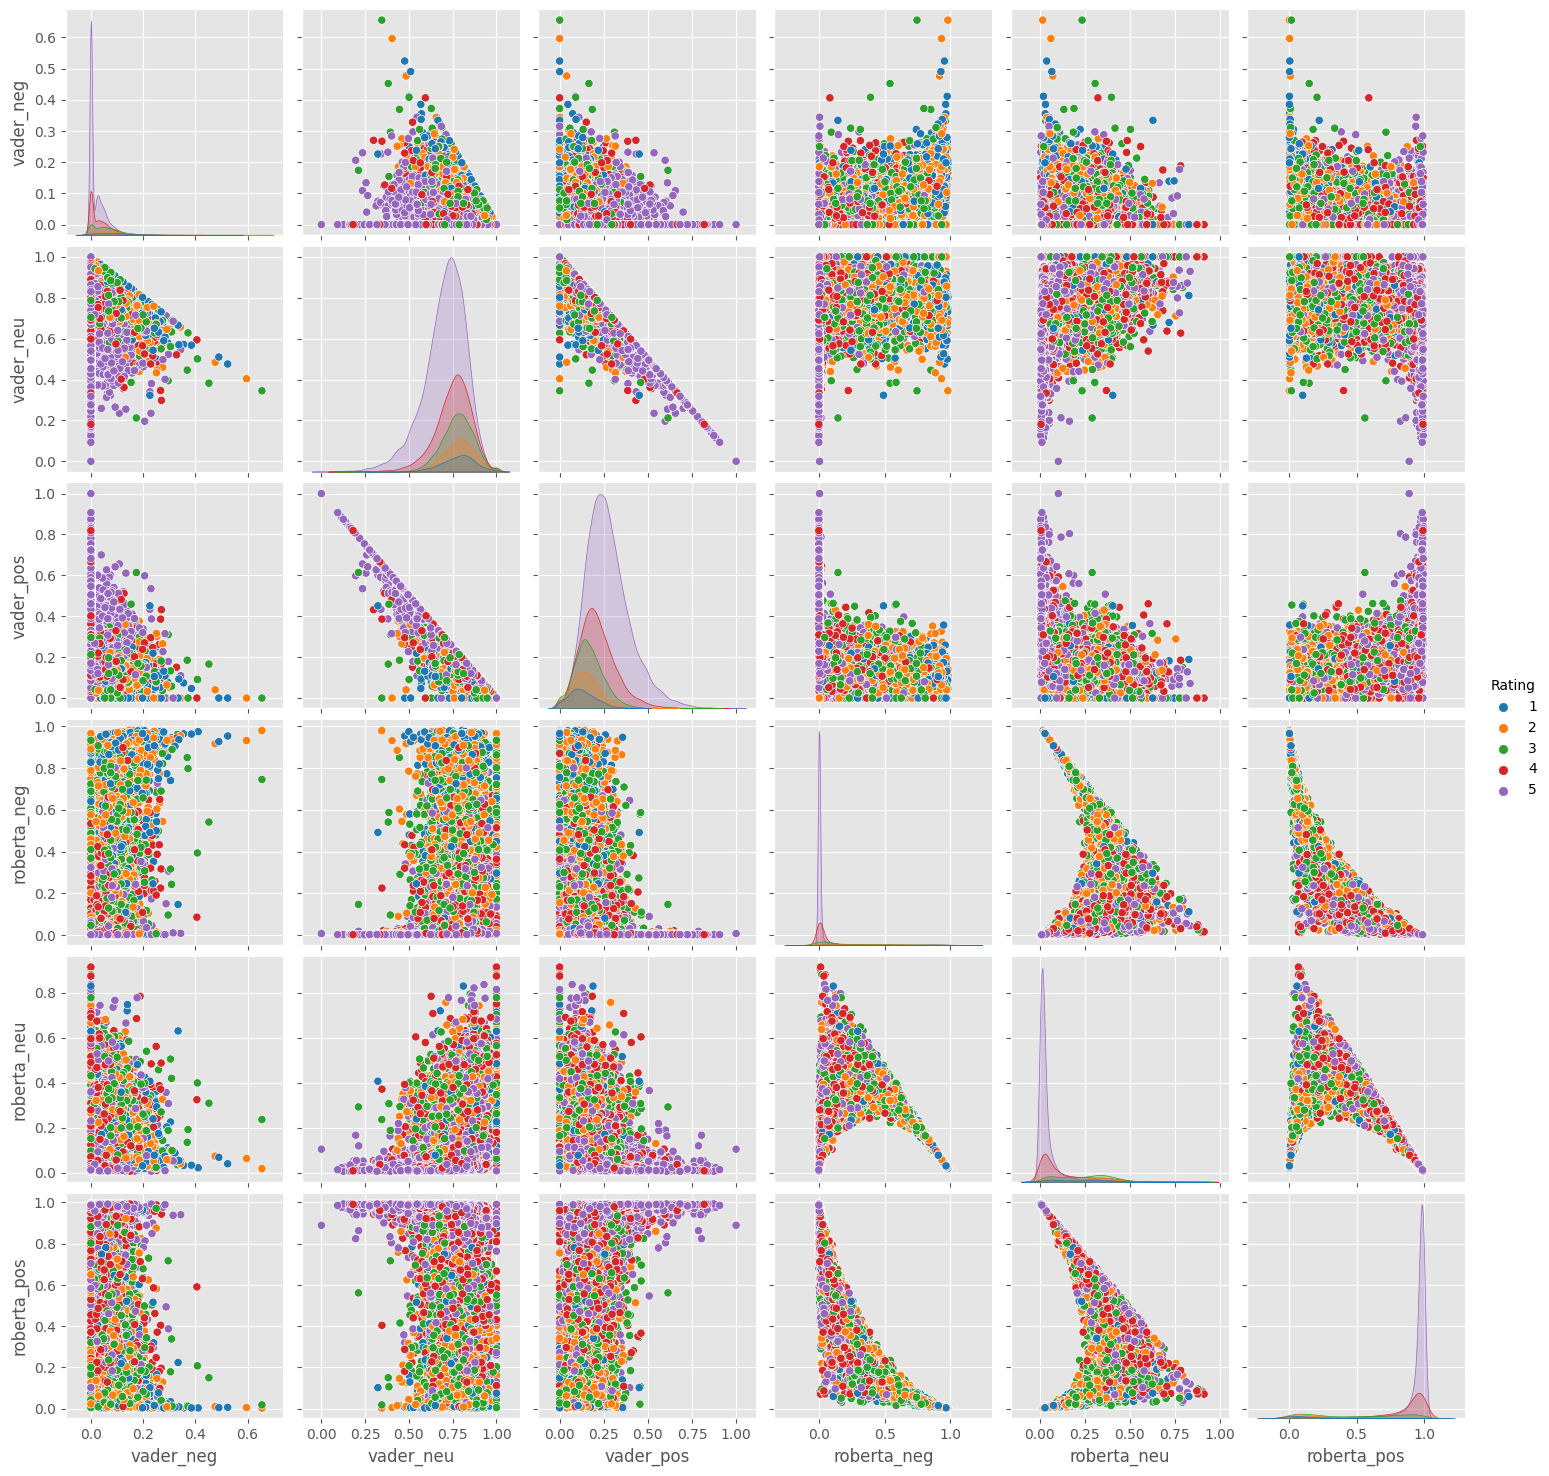

In [32]:
#combine and compare
sns.pairplot(data=results_dframe,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [33]:
results_dframe.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review Text'].values[0]

'I saw this dress in the catalog and had to have it. when i went to the store it was sold out so i had them order and ship it to me in two sizes - my regular and one size larger. when i got them, i tried on my regular size first and it was just perfect! beautiful pattern and material. light and airy. sexy with the low-cut "keyhole." i am sooo happy with my purchase.'

In [34]:
results_dframe.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review Text'].values[0]

'Super itchy! had to return.'

The above two codes retrieve the text of a review with the highest positive sentiment score of both RoBERTa and VADER (roberta_pos and vader_pos) among reviews with a rating of 1. We can see RoBERTa performed good, and in case of VADER, it still gave a positive score for the sentence. 

In [35]:
results_dframe.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review Text'].values[0]

"This is a review of customer service in general,from several issues with online shopping! i don't understand why you ask for my opinion and say it counts when clearly it does not.i have had a lot of issues. receiving parcels from one of your carriers,laser ship and i have reported the issues to them and retailer,but it appears only the good parts are read.this poor service cost me money in postage and lost discounts but again i'm ignored,and i had to order my last returned parcel again pay more fo"

In [36]:
results_dframe.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review Text'].values[0]

"Love the collar, cut is cropped but i'm wearing a tank under for hole coverage anyways. no complaints!"

The above two codes retrieve the text of a review with the highest negative sentiment score from both RoBERTa and VADER(roberta_neg and vader_neg) among reviews with a rating of 5.

# Conclusion

Language is Complex. Sometimes, understanding the sentiment behind a sentence requires us to look beyond the semantics, and consider prosody, context etc. Especially in cases like ambiguous sentences and sarcastic sentences where the words mean one thing and the sentiment is just the opposite, we human beings are extreamely good at this. In this project, I tried to look at two different sentiment analysis tools - VADER in NLTK and RoBERTa pre-trained model and tried to do a comparitive sentiment analysis. Through thorough exploratory data analysis, we got insights into the diverse sentiments expressed by users. The visualization of results through wordcloud,barplot,pair plots etc. and the comparison study shed light on the performance of these methods across various tests. Both the methods have its own strengths and limitations. 

We saw that even though VADER is good at identifying the sentiments of simple and straight-forward sentences, it struggles with certain types of context-dependent sentiment, as its lexicon-based approach does not capture nuanced meanings or sarcasm well. Even in sentences which are explicitly negative, VADER gave a positive score which surprised me. Eventhough VADER is designed to recognize and interpret emoticons,when checked with sentences with emoticons, VADER failed to identify the sentiment properly.

RoBERTa, as expected performed better on analysing sentiments. But still in some cases like sarcastic and ambiguous sentences, RoBERTa wasn't that great. 
The outcomes of this project emphasize the importance of choosing an appropriate sentiment analysis tool based on the specific objectives and characteristics of the dataset and along with that how complex understanding language can be. Natural Language Understanding and developing tools that can perform like human beings is a challenging yet important step towards a more powerful AI.